In [1]:
import add_noise as noise
import data_smoothing as smooth
import find_peaks as findpeak
import peak_character as character
import numpy as np

In [2]:
nm, time, z = smooth.load_data('20180418_twogaussian_spectralshfit.txt')


In [3]:
noise_coeff = 0.1
z_noisy = noise.noise_matrix(nm, z, noise_coeff)

In [4]:
np.shape(z_noisy)

(700, 500)

In [5]:
#save noisy data
z_noisy_save = np.empty((np.shape(z_noisy)[0]+1, np.shape(z_noisy)[1]+1))
z_noisy_save[1:, 0] = nm
z_noisy_save[0, 1:] = time
z_noisy_save[1:, 1:] = z_noisy
np.savetxt('20180418_twogaussian_spectralshfit_0.1noise.txt', z_noisy_save, fmt='%.3f',delimiter='\t')

In [6]:
type (np.shape(z)[1])

int

In [7]:
z_smooth = smooth.earth_smooth_matrix(nm, z)

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [12]:
threshold = 0
mindist = 0
idx, height, fwhm = character.peak_matrix(nm,np.array(z_smooth), threshold, mindist)

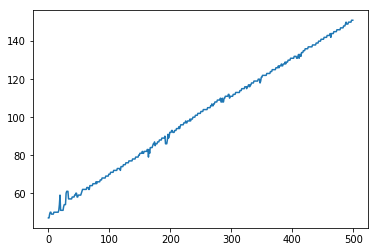

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(time, idx[0])
